# Classifications


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import norm
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn.metrics import classification_report


# Create 4 different datasets

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n = 1000 # the number of total samples


X, y = make_classification(n_samples=n, n_features=n_feature, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


datasets = [
    make_blobs(n_samples=n, centers=n_components, n_features=n_feature, 
                  cluster_std = [4] * n_components, # the std of each cluster
                  random_state=2), # 2
    make_moons(n_samples= n, noise=0.3, random_state=0),
    make_circles(n_samples = n, noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

<Figure size 2700x900 with 0 Axes>

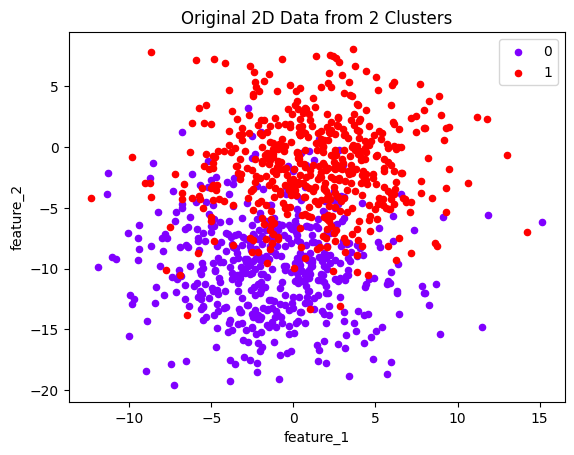

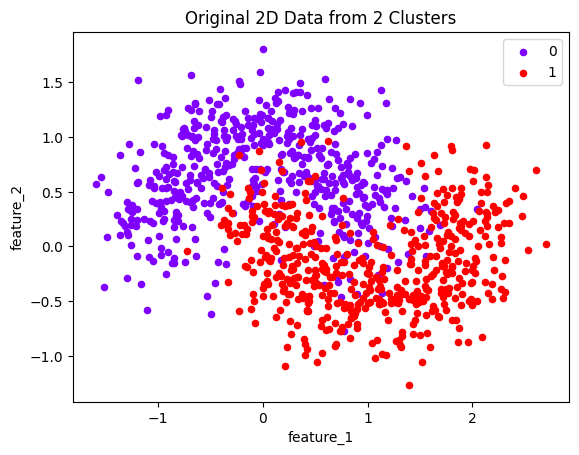

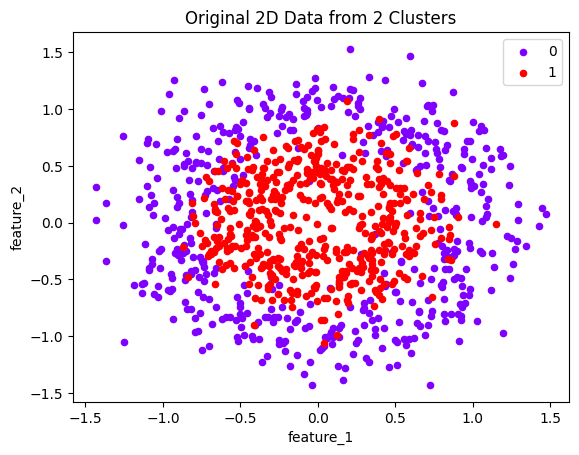

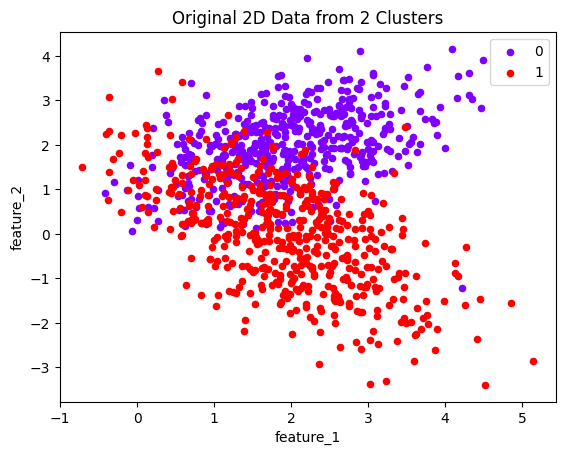

In [3]:
figure = plt.figure(figsize=(27, 9))


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    cluster_name = set(y)
    df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))

    colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
    fig, ax = plt.subplots()

    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))

    plt.title('Original 2D Data from {} Clusters'.format(n_components))
    plt.show()


In [4]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Gaussian Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]



for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    
    print("Dataset number: ", ds_cnt)
    print("############################")
     # iterate over classifiers
    for name, clf in zip(names, classifiers):
        print("Classifieir name is: ", name, "  Model: ",clf)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        print("Accuracy of Classifieir ", name, " is ",  score)
        y_pred = clf.predict(X_test)
        
        print(classification_report(y_test, y_pred))
        print("-------------------------------------")
    print("############################")

        


Dataset number:  0
############################
Classifieir name is:  Nearest Neighbors   Model:  KNeighborsClassifier(n_neighbors=3)
Accuracy of Classifieir  Nearest Neighbors  is  0.8425
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       202
           1       0.84      0.84      0.84       198

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

-------------------------------------
Classifieir name is:  Linear SVM   Model:  SVC(C=0.025, kernel='linear')
Accuracy of Classifieir  Linear SVM  is  0.8775
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       202
           1       0.89      0.86      0.87       198

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Accuracy of Classifieir  Nearest Neighbors  is  0.865
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       194
           1       0.87      0.86      0.87       206

    accuracy                           0.86       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.86      0.87       400

-------------------------------------
Classifieir name is:  Linear SVM   Model:  SVC(C=0.025, kernel='linear')
Accuracy of Classifieir  Linear SVM  is  0.485
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       194
           1       0.00      0.00      0.00       206

    accuracy                           0.48       400
   macro avg       0.24      0.50      0.33       400
weighted avg       0.24      0.48      0.32       400

-------------------------------------
Classifieir name is:  RBF SVM   Model:  SVC(C=1, gamma=2)
Accuracy of Classifieir  RBF SVM  is  

/Users/kiat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kiat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kiat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Classifieir  Gaussian Process  is  0.8925
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.89      0.90      0.90       206

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

-------------------------------------
Classifieir name is:  Decision Tree   Model:  DecisionTreeClassifier(max_depth=5)
Accuracy of Classifieir  Decision Tree  is  0.8575
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       194
           1       0.82      0.92      0.87       206

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

-------------------------------------
Classifieir name is:  Random Forest   Model:  RandomForestClassifier(max_depth=5, m